# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

In [1]:
! git clone https://www.github.com/DS3001/assignment2

fatal: destination path 'assignment2' already exists and is not an empty directory.


**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. The paper is about how to make cleaning data easier, specifically data tidying
2. The tidy data standard is intended to make a single, intentional design for data to be transformed into in order to better facilitate data cleaning and analysis
3. The family sentence means that every tidy dataset looks the same; it is tidy only because it conforms to that standard. Each untidy dataset is not in line with the standards, but they all have different things that set them apart from the standard. The observations and variables sentence means that we are easily able to look at a dataset and say that something fits into the category of "observation" or "variable," but not exactly what that observation/variable means or is describing
4. A variable is a characteristic that is being studied, like "height" or "weight." An observation is an item that is being studied for those characteristics (variables), like "John Doe". A value is a specific measure of a variable obtained from one observation, like "6'2"" would be a specific measure of height for John Doe.
5. In tidy data, the variables make up all of the columns, the observations make up all of the rows, and the values make up the contents of the table.
6. The 5 most common issues problems with messy datasets are that column headers are values, not variables; More than one variable is in the same column; Rows and columns have variables; Multiple types of values are stored in the same table; and a single value is stored in multiple tables. The data in Table 4 is "messy" because it has values in the header and variables in the rows. A dataframe is "melted" by taking all of the column names and assigning them to a new column, and the values from the dataframe are put into another new column, with all the original colvars kept
7. Table 11 has values (d1, d2, ... , d31) as the column names, while Table 12 has melted this into a single column with the values as values
8. This is saying that ultimately the use of tidy data will reach the limit of value to be gained from it, and will end up hitting a point where it cannot improve upon itself anymore. Instead, there will need to be new inquiries into how we can tidy data in different ways, that are more useful in different scenarios than the method we have now.

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
airbnb = pd.read_csv('/content/assignment2/data/airbnb_hw.csv')
airbnb['Price'] = airbnb['Price'].str.replace(',','') # Remove commas from values
airbnb['Price'] = airbnb['Price'].astype('int') # Converts from string to integer

In [3]:
sharks = pd.read_csv('/content/assignment2/data/sharks.csv')
sharks['Type'] = sharks['Type'].str.replace('Sea Disaster','Watercraft') # Combine to Watercraft
sharks['Type'] = sharks['Type'].str.replace('Boatomg','Watercraft')
sharks['Type'] = sharks['Type'].str.replace('Boat','Watercraft')
sharks['Type'] = sharks['Type'].str.replace('Boating','Watercraft')
sharks['Type'] = sharks['Type'].str.replace('Watercrafting','Watercraft')
sharks['Type'] = sharks['Type'].str.replace('Unconfirmed','Unverified') # Combine all Unverified
sharks['Type'] = sharks['Type'].str.replace('Questionable','Unverified')
sharks['Type'] = sharks['Type'].str.replace('Under investigation','Unverified')
# Combined to more general cases and fixed spelling mistakes. All remaining data are distinct to
# Necessitate keeping them, including nan as uncollected data should still remain
sharks['Type'].unique()

<ipython-input-3-189b4b0231aa>:1: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  sharks = pd.read_csv('/content/assignment2/data/sharks.csv')


array(['Unprovoked', 'Provoked', 'Unverified', 'Watercraft', 'Invalid',
       nan], dtype=object)

In [4]:
pretrial = pd.read_csv('/content/VirginiaPretrialData2017.csv')
pretrial.rename(columns={'WhetherDefendantWasReleasedPretrial':'pt_release'},inplace=True)
pretrial['pt_release'] = pretrial['pt_release'].replace(9,np.nan)
pretrial['pt_release'].unique()
# Replaced 9's with nans, since the data uses 9 as a placeholder for unknown data

<ipython-input-4-be5ecd8eb728>:1: DtypeWarning: Columns (1,4,5,7,79,80,81,82,83,84,108,163,164,165,166,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,270,271,272,273,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,301,303,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,4

array([nan,  0.,  1.])

In [5]:
pretrial['ImposedSentenceAllChargeInContactEvent'].mask(pretrial['SentenceTypeAllChargesAtConvictionInContactEvent'] >= 4,0,inplace=True)
pretrial[['ImposedSentenceAllChargeInContactEvent','SentenceTypeAllChargesAtConvictionInContactEvent']].head(20)

,ImposedSentenceAllChargeInContactEvent,SentenceTypeAllChargesAtConvictionInContactEvent
0,0,9
1,60,0
2,12,1
3,.985626283367556,1
4,0,4
5,12,0
6,36,1
7,6,0
8,24,1
9,12,1


**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [6]:
print(airbnb.shape) # there are 30478 rows (observations) and 13 columns
print(airbnb.columns) # Name of the variables
airbnb.head()

(30478, 13)
Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [7]:
pd.crosstab(airbnb['Room Type'],airbnb['Property Type'])
# Apartments are by far the most common, with houses coming in a distant second
# Bed & Breakfast, Castle, Chalet, Dorms, House, Huts, "Other", Tents and Treehouses are more likely to be
# rented as just a private room instead of the entire home, which makes sense considering the type of
# structure they are, and how that may be cost prohibitive

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


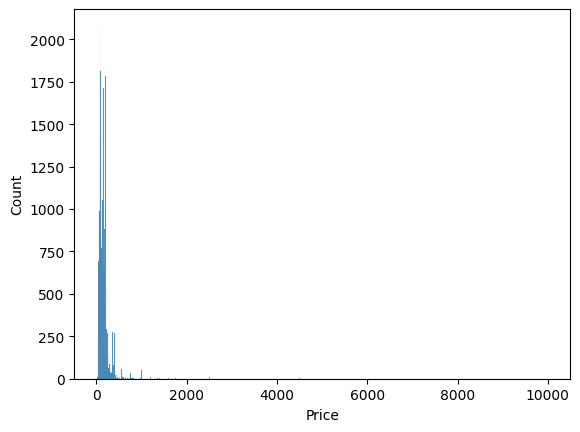

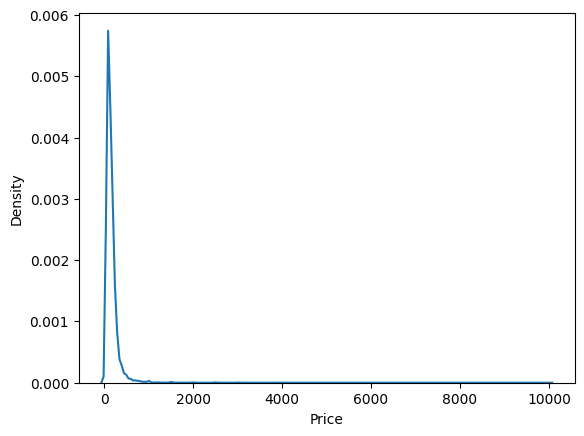

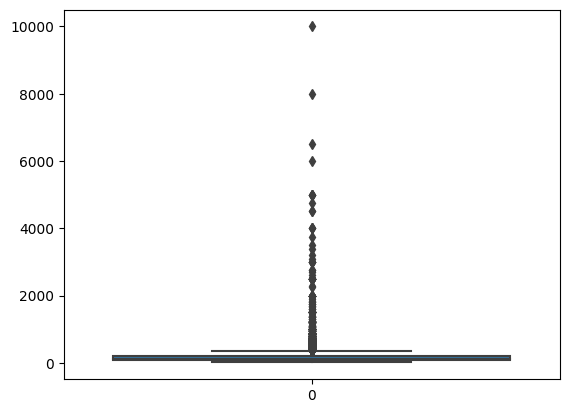

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(airbnb['Price'])
plt.show()
sns.kdeplot(airbnb['Price'])
plt.show()
sns.boxplot(airbnb['Price'])
plt.show()
airbnb['Price'].describe()
# It is clear there are a lot of outliers (explicitly shown by boxplot best, though clear in all graphs)

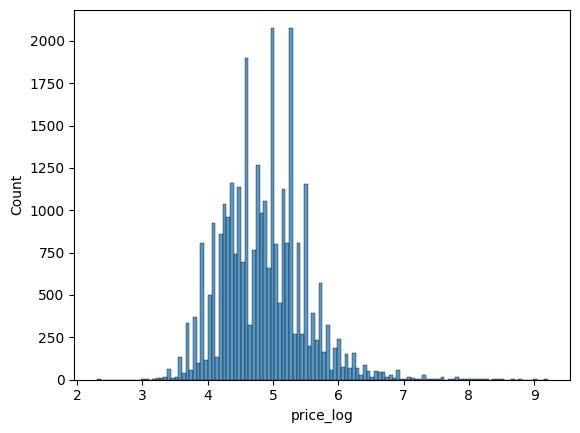

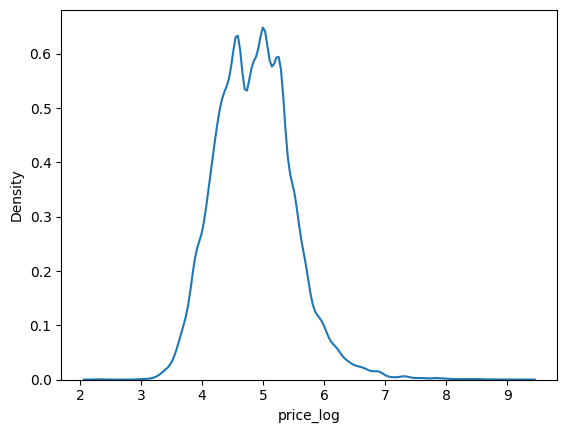

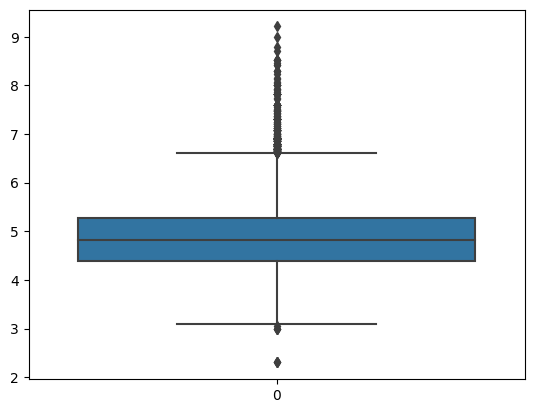

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: price_log, dtype: float64

In [9]:
airbnb['price_log'] = np.log(airbnb['Price'])
sns.histplot(airbnb['price_log'])
plt.show()
sns.kdeplot(airbnb['price_log'])
plt.show()
sns.boxplot(airbnb['price_log'])
plt.show()
airbnb['price_log'].describe()
# Still lots of outliers, but nowhere near as significant, and a much better visualization

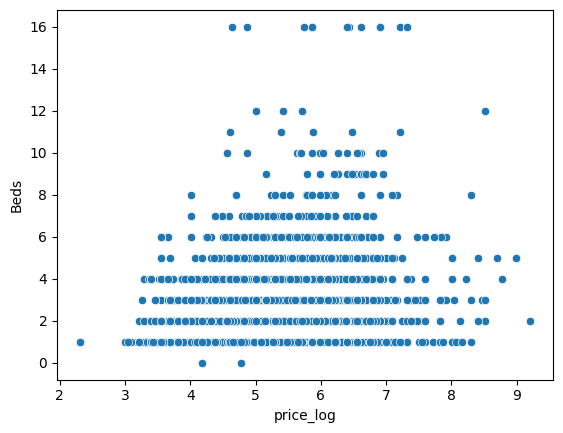

        count      mean       std       min       25%       50%       75%  \
Beds                                                                        
0.0       2.0  4.476755  0.427613  4.174387  4.325571  4.476755  4.627939   
1.0   20344.0  4.686977  0.539666  2.302585  4.317488  4.605170  5.043425   
2.0    6610.0  5.094504  0.580425  3.218876  4.744932  5.075174  5.416100   
3.0    2071.0  5.340837  0.644742  3.258097  4.941642  5.298317  5.703782   
4.0     783.0  5.480463  0.721360  3.295837  5.010635  5.509388  5.926926   
5.0     284.0  5.669484  0.735623  3.555348  5.245705  5.669881  6.109248   
6.0     177.0  5.651790  0.824358  3.555348  5.293305  5.616771  6.052089   
7.0      45.0  5.617009  0.693481  4.007333  5.176150  5.703782  6.098074   
8.0      24.0  5.956200  0.862418  4.007333  5.495121  5.857933  6.176138   
9.0      15.0  6.341645  0.461176  5.164786  6.098011  6.476972  6.636468   
10.0     16.0  5.945514  0.762220  4.553877  5.673034  6.009872  6.559853   

In [10]:
sns.scatterplot(data=airbnb,x='price_log',y='Beds')
plt.show()
# There is a positive correlation between the logarithmic price and the number of beds in a rental
# It is hard to tell due to overlap
print(airbnb.groupby('Beds').describe()['price_log'])
# The means show the positive correlation much better
# The standard deviation shows that the price generally deviates more as the # of beds goes up
# and that the data is likely not statistically significant

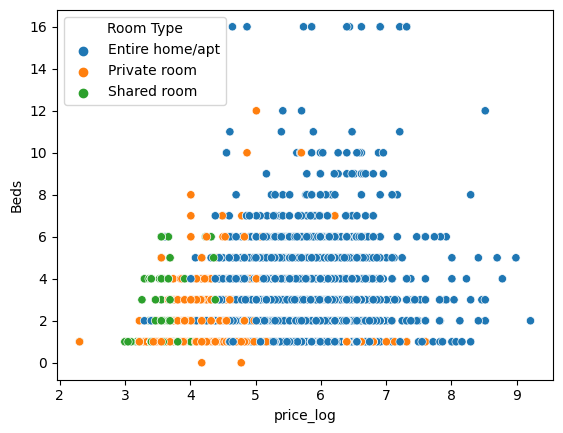

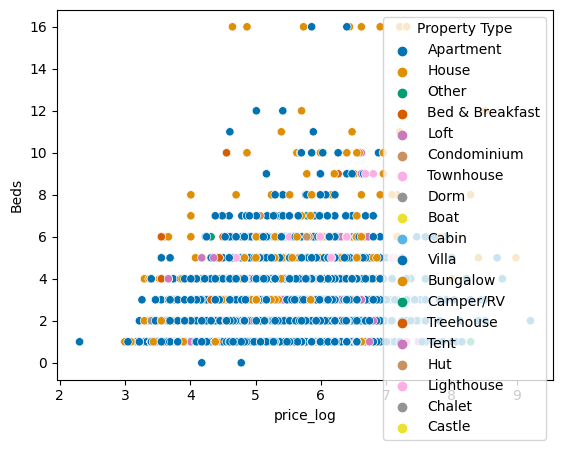

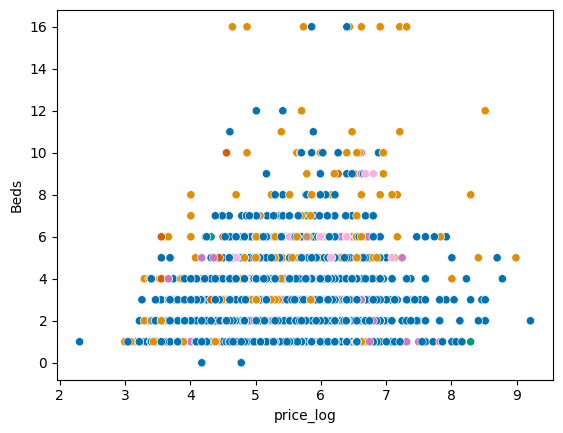

                   count      mean       std       min       25%       50%  \
Room Type                                                                    
Entire home/apt  17024.0  5.221858  0.514303  2.302585  4.905275  5.164786   
Private room     12609.0  4.418420  0.414857  2.302585  4.174387  4.382027   
Shared room        845.0  4.176785  0.547995  2.302585  3.806662  4.094345   

                      75%       max  
Room Type                            
Entire home/apt  5.480639  9.210340  
Private room     4.605170  8.006368  
Shared room      4.442651  7.824046  
                   count      mean       std       min       25%       50%  \
Property Type                                                                
Apartment        27102.0  4.874189  0.602487  2.302585  4.442651  4.867534   
Bed & Breakfast    180.0  4.511523  0.514914  3.401197  4.174387  4.471492   
Boat                 8.0  4.993387  0.300706  4.605170  4.787492  4.919475   
Bungalow             4.0  4.9

In [11]:
sns.scatterplot(data=airbnb,x='price_log',y='Beds',hue='Room Type')
plt.show()
sns.scatterplot(data=airbnb,x='price_log',y='Beds',hue='Property Type',palette='colorblind')
plt.show()
sns.scatterplot(data=airbnb,x='price_log',y='Beds',hue='Property Type',legend=False,palette='colorblind')
plt.show()
# From the graphs, it seems apparent that shared rooms are the cheapest, followed by most private rooms and then entire homes/apartments, with
# A few private rooms being more expensive. It is also clear that most properties are houses or apartments, and that houses tend to have more
# Rooms than apartments, though their prices seem to overall be comparable
print(airbnb.groupby(by='Room Type').describe()['price_log'])
print(airbnb.groupby(by='Property Type').describe()['price_log'])
# Entire homes have the highest mean price, with shared rooms having the highest standard deviation. Condominiums have the highest mean price
# and 'Other' has the highest standard deviation. The median is probably better to use here since we took the log of each value, which distorts
# The scale in a non-linear way that also distorts the mean in order to bring the values closer together

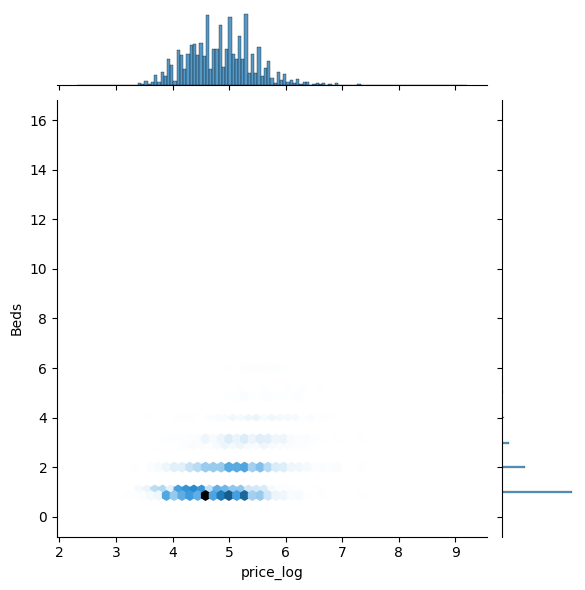

In [14]:
sns.jointplot(data=airbnb,x='price_log',y='Beds',kind='hex')
# The jointplot does a much better job than the scatter plot of showing just how concentrated the data
# is. It shows that the vast majority of rentals have 1, 2, or sometimes 3 beds, which is not as easily
# seen in the scatter plot. In addition, it does a better job showing that most of the rentals are
# focused in a very specific area (4-6 on the price log, 1-2 beds), and allows us to see more general
# trends for both axes and their overlap

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.